1) Read Data
Change Column names to all small aplhabtes abd space replaced by underscores
Check the dtypes of all colmuns, missing values and all
Take all columns whcih have string values and convert the string values in them to small caps lock and underscores
2) Data Exploration
   For each column, find the number of unique values and the unique values
   Plot the distribution of msrp columnk and then log1p() for this column
   For each column, find the missing values and the number of them
3) Find the length of training, validation and testing data set and create these data sets. Dont use functions and then with
idx = np.arange(n) and then np.random.seed(42), np.random.shuffle(idx) and then reset their indices. Create y-train,y_val,y_test columns
corresponding to them with log1p(data.msrp.values) and delete the column data["msrp"] from all three data sets
4) Fit a Linear regression model and compare it with inv(X.T.X)(X)
5) Simple Feature Engineering: a)Current year - "Year" to get the Age of the car and this to the base_features and check the RMSE and plot the histplot again to see the difference between prediceted and actual
   
TODO

7) Categorical Features: One Hot Encoding to Encode "Number of doors", add these features to the base and check RMSE and predictions.
And then do the one-hot encoding for "make" column and similarly do this for other features in the dataset. And now check the RMSE and predictions
8) Regularization:: Now proceed with lasso and ridge regression, Check how the weight changes with more regularization variable. Find the best value of "r" and try them on validation data set. And the rmse and predictions.
Finally, take train = train+val data set and test the model on testing data set.

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv(r"/Users/pranayrastogi/PycharmProjects/ML_Zoomcamp/data/data.csv")
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
data.info(), data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

(None, (11914, 16))

In [4]:
cols = list()
for col in data.columns:
    cols.append(col.lower().replace(" ","_"))

data.columns = cols
print(data.columns)

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')


In [5]:
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
data.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [7]:
object_cols = data.select_dtypes(include="object").columns
object_cols

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [8]:
for oc in object_cols:
    data[oc] = data[oc].str.lower().str.replace(" ","_")

data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [10]:
for col in data.columns:
    print(col)
    print(f"The number of unique values are {data[col].nunique()}")
    print(data[col].unique())
    print()
    print()

make
The number of unique values are 48
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston_martin' 'land_rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']


model
The number of unique values are 914
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240' '2' '3_series_gran_turismo' '3_series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4_series_gran_coupe' '4_series' '400-class' '420-class' '456m'
 '458_italia' '4c' '4runner' '5_series_gran_turismo' '5_series'
 '500-class' '500e' '500' '500l' '500x' '550' '560-class' '570s' '575m'
 '57' '599' '5' 

<Axes: xlabel='msrp', ylabel='Count'>

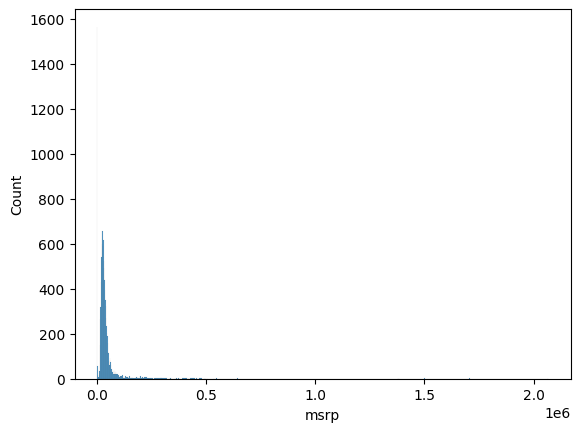

In [11]:
sns.histplot(data["msrp"])

<Axes: xlabel='msrp', ylabel='Count'>

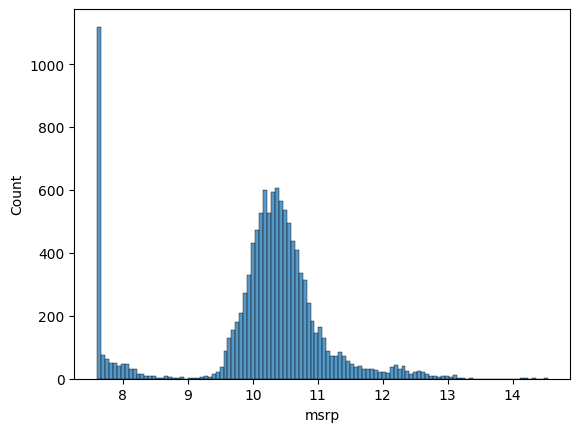

In [12]:
sns.histplot(np.log1p(data["msrp"]))

### Finding the missing values in each column

In [13]:
data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Training and Testing Data Sets

In [14]:
n_train = math.floor(0.60*len(data))
n_val = math.floor(0.20*len(data))
n_test = len(data) - n_train - n_val

In [15]:
n_test, n_val, n_train

(2384, 2382, 7148)

In [16]:
df_train = data.iloc[:n_train]
df_val = data.iloc[n_train:n_train+n_val]
df_test = data.iloc[n_train+n_val:]

In [17]:
len(df_val[df_val["make"]=="bmw"]), len(df_train[df_train["make"]=="bmw"]), len(df_test[df_test["make"]=="bmw"])

(0, 257, 77)

As we can see, the indexing needs to be shuffled, so that all the samples are randomly spread to each of the data sets otherwise few car makes cannot be trained and when they evenutally land up in validation or training data sets, they will give results with high variablity.

In [18]:
n = len(data)
n

11914

In [19]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913], shape=(11914,))

In [20]:
np.random.seed(2)

In [21]:
np.random.shuffle(idx)

In [22]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [24]:
data.groupby("make")["msrp"].mean().sort_values()

make
plymouth         3.122902e+03
oldsmobile       1.154254e+04
suzuki           1.790721e+04
pontiac          1.932155e+04
scion            1.993250e+04
mazda            2.003938e+04
mitsubishi       2.124054e+04
dodge            2.239006e+04
fiat             2.267024e+04
hyundai          2.459704e+04
subaru           2.482750e+04
kia              2.531017e+04
honda            2.667434e+04
chrysler         2.672296e+04
ford             2.739927e+04
saab             2.741350e+04
volkswagen       2.810238e+04
buick            2.820661e+04
chevrolet        2.835039e+04
volvo            2.854116e+04
nissan           2.858343e+04
toyota           2.903002e+04
gmc              3.049330e+04
acura            3.488759e+04
hummer           3.646441e+04
infiniti         4.239421e+04
lincoln          4.283983e+04
genesis          4.661667e+04
lexus            4.754907e+04
audi             5.345211e+04
cadillac         5.623132e+04
bmw              6.154676e+04
alfa_romeo       6.160000e+04
land_

In [25]:
def prepare_data_sets(data, n_train, n_val):
    idx = np.arange(len(data))
    df_train = data.iloc[idx[:n_train]]
    df_val = data.iloc[idx[n_train:n_train+n_val]]
    df_test = data.iloc[idx[n_train+n_val:]]
    
    df_train.reset_index(inplace=True, drop=True)
    df_val.reset_index(inplace=True, drop=True)
    df_test.reset_index(inplace=True, drop=True)
    
    y_train = np.log1p(df_train["msrp"].values)
    y_test = np.log1p(df_test["msrp"].values)
    y_val = np.log1p(df_val["msrp"].values)
    
    del df_train["msrp"]
    del df_test["msrp"]
    del df_val["msrp"]

    return df_train, y_train, df_val, y_val, df_test, y_test


df_train, y_train, df_val, y_val, df_test, y_test = prepare_data_sets(data, n_train, n_val)

In [26]:
"""

def fill_with_group_mode(df, group_cols, target_col):
    def get_mode(x):
        m = x.mode(dropna=True)
        return m.iloc[0] if not m.empty else pd.NA

    mode_series = df.groupby(group_cols)[target_col].transform(get_mode)
    df[target_col] = df[target_col].fillna(mode_series)

    return df


categorical_cols = [
    "engine_fuel_type",
    "market_category"
]

numeric_cols = [
    "engine_hp",
    "engine_cylinders"
]

for col in categorical_cols:
    try:
        data = fill_with_group_mode(data, ["make", "model"], col)
    except:
        data[col] = data[col].fillna(data[col].mode().iloc[0])

for col in numeric_cols:
    try:
        data = fill_with_group_mode(data, ["make", "model"], col)
    except:
        data[col] = data[col].fillna(data[col].mode().iloc[0])
"""

'\n\ndef fill_with_group_mode(df, group_cols, target_col):\n    def get_mode(x):\n        m = x.mode(dropna=True)\n        return m.iloc[0] if not m.empty else pd.NA\n\n    mode_series = df.groupby(group_cols)[target_col].transform(get_mode)\n    df[target_col] = df[target_col].fillna(mode_series)\n\n    return df\n\n\ncategorical_cols = [\n    "engine_fuel_type",\n    "market_category"\n]\n\nnumeric_cols = [\n    "engine_hp",\n    "engine_cylinders"\n]\n\nfor col in categorical_cols:\n    try:\n        data = fill_with_group_mode(data, ["make", "model"], col)\n    except:\n        data[col] = data[col].fillna(data[col].mode().iloc[0])\n\nfor col in numeric_cols:\n    try:\n        data = fill_with_group_mode(data, ["make", "model"], col)\n    except:\n        data[col] = data[col].fillna(data[col].mode().iloc[0])\n'

In [27]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916


In [28]:
df_train.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        0
engine_hp              62
engine_cylinders        9
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      2078
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
dtype: int64

In [29]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

# Linear Regression Model

### Applying Base Linear Regression Model

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def apply_linear_regression_model(df_train, y_train, df_val, y_val):
    X = df_train
    y = y_train
    
    model = LinearRegression()
    model.fit(X, y)

    coefficients = pd.Series(
    model.coef_,
    index=X.columns,
    name="coefficient"
    )

    print(coefficients.sort_values())
    print(f"Model intercept={model.intercept_}")
    
    y_pred_val = model.predict(df_val)
    
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    r2 = r2_score(y_val, y_pred_val)
    metrics = {
        "RMSE": rmse,
        "R2": r2,
        "Intercept": model.intercept_
    }
    print(metrics)

    sns.histplot(y_val, color= "red", bins=50, alpha = 0.75, label="Actual")
    sns.histplot(y_pred_val, color= "blue", bins=50, alpha = 0.55, label="Predicted")
    plt.legend()
        

number_of_doors    -0.028452
highway_mpg        -0.005955
popularity         -0.000059
engine_hp           0.003429
city_mpg            0.015173
year                0.098849
engine_cylinders    0.112753
Name: coefficient, dtype: float64
Model intercept=-190.02414513608696
{'RMSE': np.float64(0.5090778478118757), 'R2': 0.8155345967038214, 'Intercept': np.float64(-190.02414513608696)}


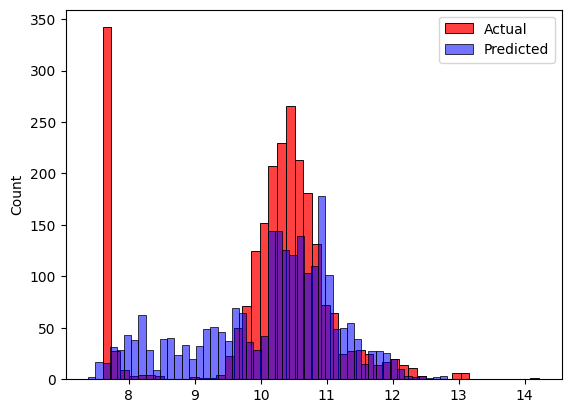

In [32]:
base_model_features = df_train.select_dtypes(include="number").columns
x_for_training = df_train[base_model_features].fillna(0)
x_for_validation = df_val[base_model_features].fillna(0)

apply_linear_regression_model(x_for_training, y_train, x_for_validation, y_val)

In [33]:
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [34]:
current_year = pd.Timestamp.now().year
data["age"] = current_year - data["year"]
del data["year"]
data.head()

,make,model,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,age
0,bmw,1_series_m,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,15
1,bmw,1_series,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650,15
2,bmw,1_series,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350,15
3,bmw,1_series,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450,15
4,bmw,1_series,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500,15


In [35]:
data.isnull().sum()

make                    0
model                   0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
age                     0
dtype: int64

age                -0.098849
number_of_doors    -0.028452
highway_mpg        -0.005955
popularity         -0.000059
engine_hp           0.003429
city_mpg            0.015173
engine_cylinders    0.112753
Name: coefficient, dtype: float64
Model intercept=10.244646486618125
{'RMSE': np.float64(0.5090778478118797), 'R2': 0.8155345967038184, 'Intercept': np.float64(10.244646486618125)}


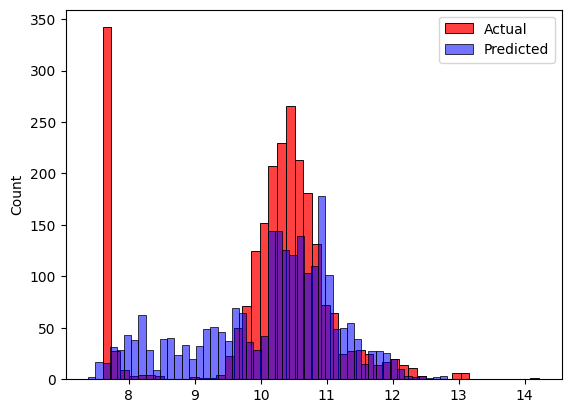

In [39]:
df_train, y_train, df_val, y_val, df_test, y_test = prepare_data_sets(data, n_train, n_val)
base_model_features = df_train.select_dtypes(include="number").columns

x_for_training = df_train[base_model_features].fillna(0)
x_for_validation = df_val[base_model_features].fillna(0)

apply_linear_regression_model(x_for_training, y_train, x_for_validation, y_val)

In [41]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ["make"]

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded = encoder.fit_transform(data[categorical_cols])

encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(categorical_cols)
)

data = pd.concat([data.drop(columns=categorical_cols), encoded_df], axis=1)

In [42]:
data.dtypes

model                 object
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
                      ...   
make_suzuki          float64
make_tesla           float64
make_toyota          float64
make_volkswagen      float64
make_volvo           float64
Length: 63, dtype: object

make_plymouth        -9.004038e-01
make_volvo           -7.921851e-01
make_genesis         -7.056864e-01
make_scion           -6.678734e-01
make_fiat            -6.486420e-01
make_hyundai         -5.748122e-01
make_mazda           -5.221795e-01
make_kia             -5.164752e-01
make_oldsmobile      -5.107728e-01
make_chevrolet       -4.957116e-01
make_nissan          -4.318131e-01
make_honda           -4.017707e-01
make_dodge           -3.982488e-01
make_gmc             -3.785307e-01
make_subaru          -3.755936e-01
make_volkswagen      -3.630804e-01
make_acura           -3.610394e-01
make_buick           -3.511377e-01
make_chrysler        -3.490764e-01
make_mitsubishi      -3.192673e-01
make_mercedes-benz   -2.994888e-01
make_lincoln         -2.394770e-01
make_saab            -2.293394e-01
make_toyota          -2.208459e-01
make_suzuki          -1.346189e-01
make_infiniti        -1.102908e-01
make_lexus           -1.042320e-01
age                  -1.027600e-01
make_cadillac       

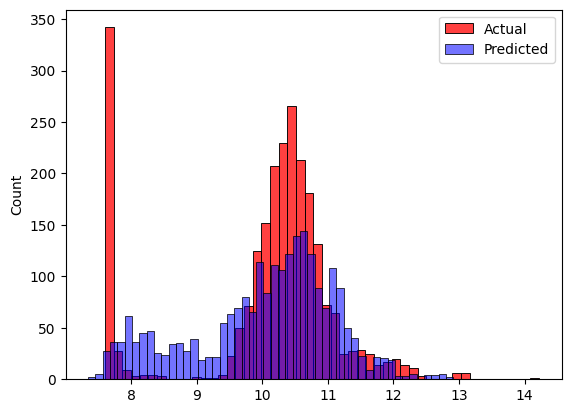

In [43]:
df_train, y_train, df_val, y_val, df_test, y_test = prepare_data_sets(data, n_train, n_val)
base_model_features = df_train.select_dtypes(include="number").columns

x_for_training = df_train[base_model_features].fillna(0)
x_for_validation = df_val[base_model_features].fillna(0)

apply_linear_regression_model(x_for_training, y_train, x_for_validation, y_val)

In [ ]:
x_for_training = df_train.fillna(0)
x_for_validation = df_val.fillna(0)

apply_linear_regression_model(x_for_training, y_train, x_for_validation, y_val)

In [ ]:
def prepare_categorical_features(data):
    from sklearn.preprocessing import OneHotEncoder
    categorical_cols = data.select_dtypes(include="object").columns
    
    encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    encoded = encoder.fit_transform(data[categorical_cols])
    
    encoded_df = pd.DataFrame(
        encoded,
        columns=encoder.get_feature_names_out(categorical_cols)
    )
    
    df_final = pd.concat([data.drop(columns=categorical_cols), encoded_df], axis=1)
    return df_final


